<a href="https://colab.research.google.com/github/Doug-Vo/Summer-2025/blob/main/Abalone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo


# fetch dataset
abalone = fetch_ucirepo(id=1)

# data (as pandas dataframes)
X = abalone.data.features
y = abalone.data.targets




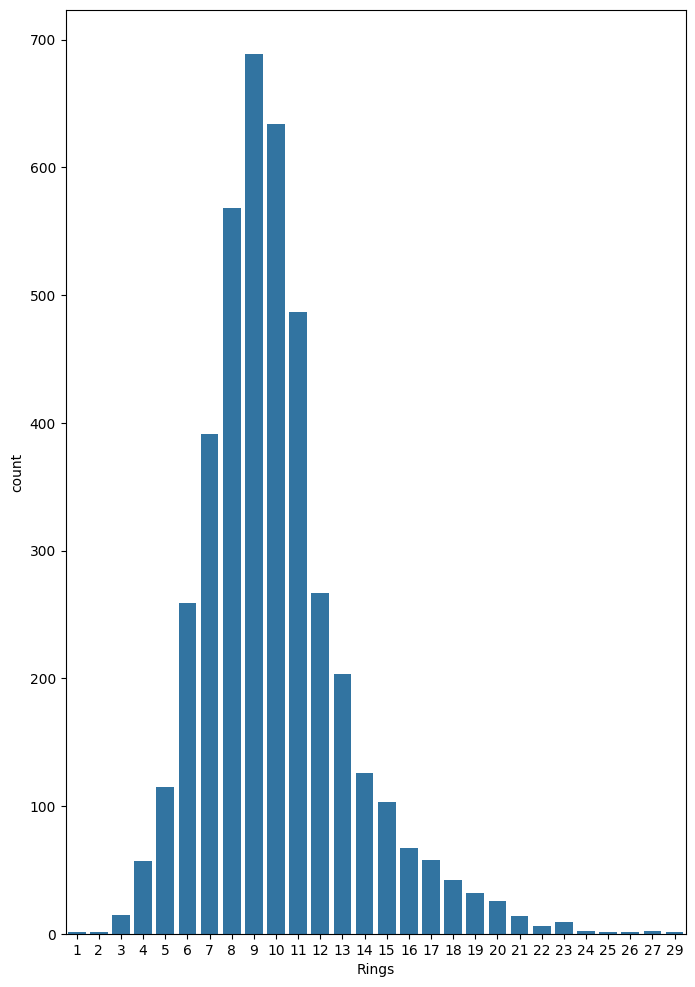

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.concat([X,y],axis = 1)
plt.figure(figsize=(8,12))
sns.countplot(x = 'Rings', data = df)
plt.show()

df




In [ ]:


X_processed = pd.get_dummies(X, columns=['Sex'], drop_first = True)

X_processed.head()


,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,False,True
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,False,True
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,False,False
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,False,True
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,True,False


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size = 0.2, random_state = 42)

lin_model = LinearRegression()

lin_model.fit(X_train, y_train)

y_pred = lin_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"Mean absolute error: {mae : .4f}" )
print(f"r2 Score {r2 : .4f}")



Mean absolute error:  1.5931
r2 Score  0.5482


Mean Abs Error: 1.623206
R2 Score: 0.424412


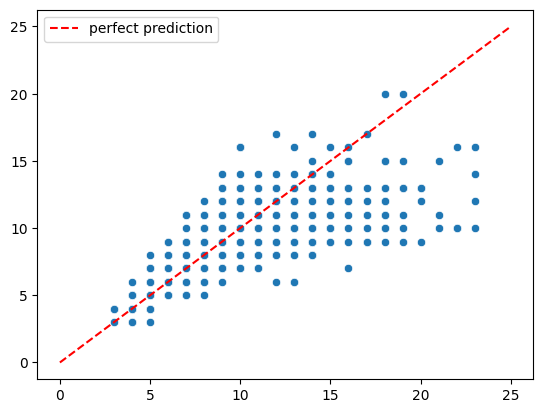

In [ ]:
rf_model = RandomForestClassifier(random_state = 42, n_estimators = 100)

rf_model.fit(X_train, y_train.values.ravel())
y_pred = rf_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Abs Error: {mae :4f}")
print(f"R2 Score: {r2:4f}")




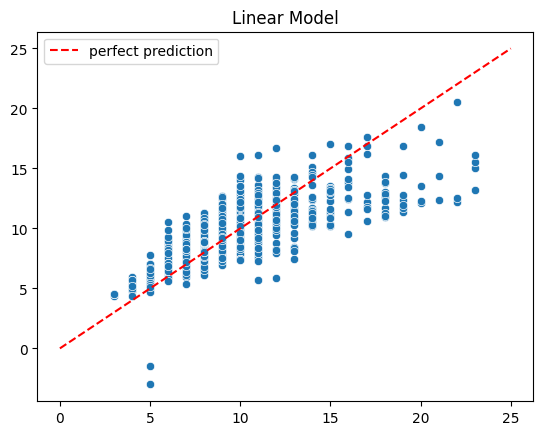

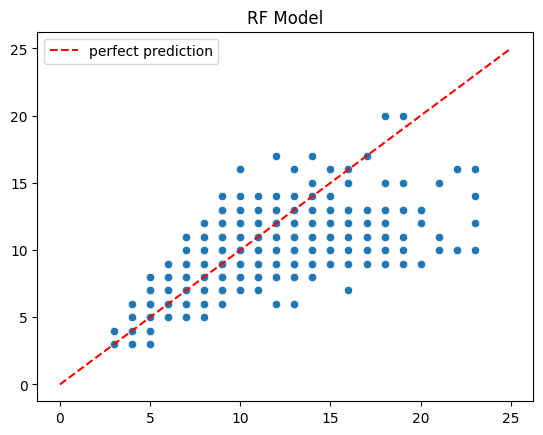

In [ ]:
y_pred_rf = rf_model.predict(X_test)

y_pred_lin = lin_model.predict(X_test)

sns.scatterplot(x = y_test.values.ravel(), y = y_pred_lin.ravel())
plt.plot([0,25], [0,25], '--', color='red', label='perfect prediction')
plt.legend()
plt.title("Linear Model")
plt.show()


sns.scatterplot(x = y_test.values.ravel(), y  =y_pred_rf.ravel())
plt.plot([0,25], [0,25], '--', color='red', label='perfect prediction')
plt.legend()
plt.title("RF Model")
plt.show()



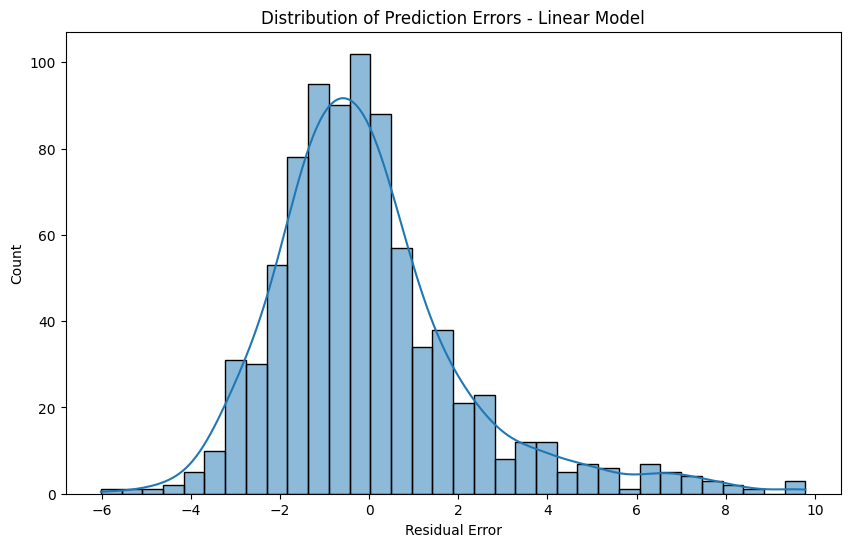

In [ ]:
# Calculate the residuals
residuals_lin = y_test.values.ravel() - y_pred_lin.ravel()
residuals_rf = y_test.values.ravel() - y_pred_rf.ravel()


plt.figure(figsize=(10, 6))
sns.histplot(residuals_lin, kde=True) # kde=True adds a smooth curve to show the shape
plt.xlabel('Residual Error')
plt.title('Distribution of Prediction Errors - Linear Model')
plt.show()





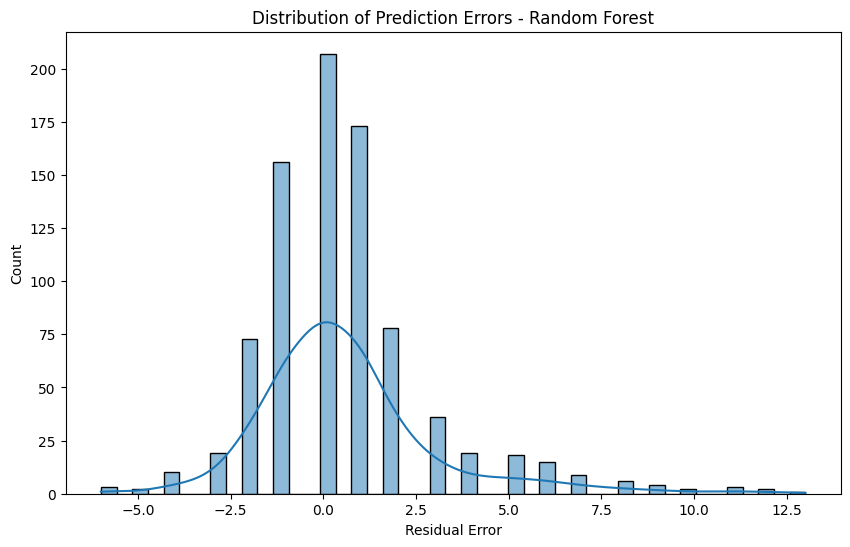

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals_rf, kde=True) # kde=True adds a smooth curve to show the shape
plt.xlabel('Residual Error')
plt.title('Distribution of Prediction Errors - Random Forest')
plt.show()